In [1]:
import torch

import clip

import cv2
import numpy as np

import os
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image

from grad_eclip import *

/home/cry/anaconda3/envs/languagebind/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def imshow(img):
    """
    Visualizing images inside jupyter notebook
    """
    plt.axis('off')
    if len(img.shape)==3:
        img = img[:,:,::-1] 	# transform image to rgb
    else:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    plt.imshow(img)
    plt.show()

In [3]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"
clipmodel, preprocess = clip.load("ViT-L/14", device=device, download_root="../../.checkpoints/CLIP")

In [4]:
semantic_path = "../../ckpt/semantic_features/clip_vitl_imagenet_zeroweights.pt"
if os.path.exists(semantic_path):
    text_embedding = torch.load(semantic_path, map_location="cpu")
    text_embedding = text_embedding.to(device)

In [6]:
img_path = "../../datasets/imagenet/ILSVRC2012_img_val/ILSVRC2012_val_00037829.JPEG"
label = 656
img = Image.open(img_path).convert("RGB").resize((224,224))

img_preprocessed = imgprocess(img).to(device).unsqueeze(0)

In [7]:
explainer = Grad_ECLIP(clipmodel, text_embedding)

In [8]:
cam = explainer(img_preprocessed, 656)

[vision_width and vision_heads]: 1024 16
[POS shape]: torch.Size([1, 1024, 16, 16]) (16, 16)


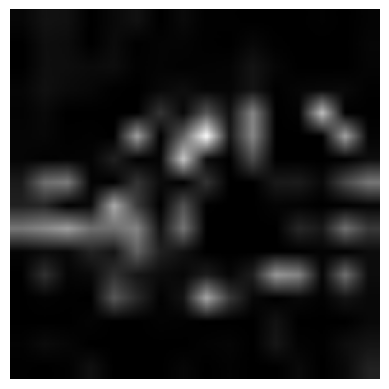

In [18]:
imshow(cv2.resize((cam*255).astype(np.uint8), (224,224)))

In [19]:
cam = cv2.resize(cam.astype(np.float32), (224,224))